## **Part-1**

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Loading the FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Training and Testing loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model Definition
class MLP(nn.Module):
    def __init__(self, hidden_layers):
        super(MLP, self).__init__()
        self.hidden_layers = hidden_layers
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(28 * 28, hidden_layers[0]))
        for i in range(len(hidden_layers) - 1):
            self.layers.append(nn.Linear(hidden_layers[i], hidden_layers[i + 1]))
        self.layers.append(nn.Linear(hidden_layers[-1], 10))

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        for layer in self.layers[:-1]:
            x = torch.sigmoid(layer(x))
        x = self.layers[-1](x)
        return x

# Function to train the model
def train_model(model, train_loader, optimizer, criterion, num_epochs=25):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:
                print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                running_loss = 0.0

# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f'Accuracy on test set: {accuracy * 100:.2f}%')
    return accuracy

# Procedural Search for hidden layer configurations and optimizers
configurations = [
    {
        "hidden_layers": [128, 64, 32],
        "batch_size": 128,
        "lr": 0.001,
        "optimizer": optim.Adam,
        "optimizer_params": {"lr": 0.001}
    },
    {
        "hidden_layers": [256, 128, 64, 32],
        "batch_size": 128,
        "lr": 0.001,
        "optimizer": optim.SGD,
        "optimizer_params": {"lr": 0.001}
    },
    {
        "hidden_layers": [512, 256, 128, 64],
        "batch_size": 128,
        "lr": 0.001,
        "optimizer": optim.RMSprop,
        "optimizer_params": {"lr": 0.001}
    },
    {
        "hidden_layers": [128, 64, 32],
        "batch_size": 256,
        "lr": 0.001,
        "optimizer": optim.Adam,
        "optimizer_params": {"lr": 0.001}
    },
    {
        "hidden_layers": [256, 128, 64, 32],
        "batch_size": 256,
        "lr": 0.001,
        "optimizer": optim.SGD,
        "optimizer_params": {"lr": 0.001}
    },
    {
        "hidden_layers": [512, 256, 128, 64],
        "batch_size": 256,
        "lr": 0.001,
        "optimizer": optim.RMSprop,
        "optimizer_params": {"lr": 0.001}
    },
    {
        "hidden_layers": [128, 64, 32],
        "batch_size": 512,
        "lr": 0.001,
        "optimizer": optim.Adam,
        "optimizer_params": {"lr": 0.001}
    },
    {
        "hidden_layers": [256, 128, 64, 32],
        "batch_size": 512,
        "lr": 0.001,
        "optimizer": optim.SGD,
        "optimizer_params": {"lr": 0.001}
    },
    {
        "hidden_layers": [512, 256, 128, 64],
        "batch_size": 512,
        "lr": 0.001,
        "optimizer": optim.Adam,
        "optimizer_params": {"lr": 0.001}
    },
    {
        "hidden_layers": [128, 64, 32],
        "batch_size": 128,
        "lr": 0.0005,
        "optimizer": optim.RMSprop,
        "optimizer_params": {"lr": 0.0005}
    },
    {
        "hidden_layers": [256, 128, 64, 32],
        "batch_size": 128,
        "lr": 0.0005,
        "optimizer": optim.SGD,
        "optimizer_params": {"lr": 0.0005}
    },
    {
        "hidden_layers": [512, 256, 128, 64],
        "batch_size": 128,
        "lr": 0.0005,
        "optimizer": optim.Adam,
        "optimizer_params": {"lr": 0.0005}
    },
    {
        "hidden_layers": [128, 64, 32],
        "batch_size": 256,
        "lr": 0.0005,
        "optimizer": optim.SGD,
        "optimizer_params": {"lr": 0.0005}
    },
    {
        "hidden_layers": [256, 128, 64, 32],
        "batch_size": 256,
        "lr": 0.0005,
        "optimizer": optim.RMSprop,
        "optimizer_params": {"lr": 0.0005}
    },
    {
        "hidden_layers": [512, 256, 128, 64],
        "batch_size": 256,
        "lr": 0.0005,
        "optimizer": optim.Adam,
        "optimizer_params": {"lr": 0.0005}
    },
    {
        "hidden_layers": [128, 64, 32],
        "batch_size": 512,
        "lr": 0.0005,
        "optimizer": optim.SGD,
        "optimizer_params": {"lr": 0.0005}
    },
    {
        "hidden_layers": [256, 128, 64, 32],
        "batch_size": 512,
        "lr": 0.0005,
        "optimizer": optim.Adam,
        "optimizer_params": {"lr": 0.0005}
    },
    {
        "hidden_layers": [512, 256, 128, 64],
        "batch_size": 512,
        "lr": 0.0005,
        "optimizer": optim.RMSprop,
        "optimizer_params": {"lr": 0.0005}
    },
    {
        "hidden_layers": [512, 256, 128, 64, 32],
        "batch_size": 512,
        "lr": 0.001,
        "optimizer": optim.Adam,
        "optimizer_params": {"lr": 0.001}
    },
    {
        "hidden_layers": [512, 256, 128, 64, 32],
        "batch_size": 512,
        "lr": 0.0001,
        "optimizer": optim.SGD,
        "optimizer_params": {"lr": 0.0001}
    }
]

best_accuracy = 0.0
best_configuration = None

for config in configurations:
    print(f"Testing Configuration: {config}")
    model = MLP(config["hidden_layers"])
    criterion = nn.CrossEntropyLoss()
    optimizer = config["optimizer"](model.parameters(), **config["optimizer_params"])
    train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=config["batch_size"], shuffle=False)
    train_model(model, train_loader, optimizer, criterion)
    accuracy = evaluate_model(model, test_loader)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_configuration = config
    print("--------------------------------------------------")

print(f"Best Configuration: {best_configuration}, Best Accuracy: {best_accuracy * 100:.2f}%")




Testing Configuration: {'hidden_layers': [128, 64, 32], 'batch_size': 128, 'lr': 0.001, 'optimizer': <class 'torch.optim.adam.Adam'>, 'optimizer_params': {'lr': 0.001}}
Epoch 1, Batch 100, Loss: 2.083004755973816
Epoch 1, Batch 200, Loss: 1.6634991466999054
Epoch 1, Batch 300, Loss: 1.3737853133678437
Epoch 1, Batch 400, Loss: 1.1821684205532075
Epoch 2, Batch 100, Loss: 0.9025735932588578
Epoch 2, Batch 200, Loss: 0.7984579139947892
Epoch 2, Batch 300, Loss: 0.7435342562198639
Epoch 2, Batch 400, Loss: 0.7019745981693268
Epoch 3, Batch 100, Loss: 0.6025022917985916
Epoch 3, Batch 200, Loss: 0.56761439204216
Epoch 3, Batch 300, Loss: 0.5244341057538986
Epoch 3, Batch 400, Loss: 0.49907181799411776
Epoch 4, Batch 100, Loss: 0.44976556360721587
Epoch 4, Batch 200, Loss: 0.4387568211555481
Epoch 4, Batch 300, Loss: 0.42982067823410036
Epoch 4, Batch 400, Loss: 0.4222863921523094
Epoch 5, Batch 100, Loss: 0.40270527958869934
Epoch 5, Batch 200, Loss: 0.39358398616313933
Epoch 5, Batch 300,

## **Part-2**

Training model for configuration 1...
Epoch 1/10
750/750 - 37s - loss: 1.1884 - accuracy: 0.5910 - val_loss: 0.8663 - val_accuracy: 0.6727 - 37s/epoch - 50ms/step
Epoch 2/10
750/750 - 37s - loss: 0.6954 - accuracy: 0.7404 - val_loss: 0.6085 - val_accuracy: 0.7791 - 37s/epoch - 49ms/step
Epoch 3/10
750/750 - 35s - loss: 0.5953 - accuracy: 0.7771 - val_loss: 0.5417 - val_accuracy: 0.8032 - 35s/epoch - 47ms/step
Epoch 4/10
750/750 - 40s - loss: 0.5302 - accuracy: 0.8033 - val_loss: 0.5076 - val_accuracy: 0.8163 - 40s/epoch - 54ms/step
Epoch 5/10
750/750 - 40s - loss: 0.4904 - accuracy: 0.8207 - val_loss: 0.4678 - val_accuracy: 0.8288 - 40s/epoch - 54ms/step
Epoch 6/10
750/750 - 40s - loss: 0.4592 - accuracy: 0.8325 - val_loss: 0.4693 - val_accuracy: 0.8276 - 40s/epoch - 53ms/step
Epoch 7/10
750/750 - 40s - loss: 0.4360 - accuracy: 0.8422 - val_loss: 0.4411 - val_accuracy: 0.8432 - 40s/epoch - 53ms/step
Epoch 8/10
750/750 - 40s - loss: 0.4187 - accuracy: 0.8476 - val_loss: 0.4271 - val_acc

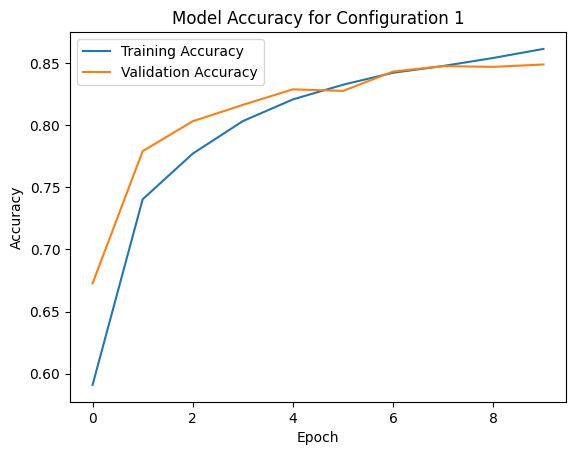

Training model for configuration 2...
Epoch 1/10
375/375 - 21s - loss: 0.8182 - accuracy: 0.7038 - val_loss: 0.5947 - val_accuracy: 0.7818 - 21s/epoch - 56ms/step
Epoch 2/10
375/375 - 21s - loss: 0.5272 - accuracy: 0.8093 - val_loss: 0.4860 - val_accuracy: 0.8249 - 21s/epoch - 56ms/step
Epoch 3/10
375/375 - 21s - loss: 0.4575 - accuracy: 0.8340 - val_loss: 0.4516 - val_accuracy: 0.8370 - 21s/epoch - 57ms/step
Epoch 4/10
375/375 - 19s - loss: 0.4130 - accuracy: 0.8498 - val_loss: 0.4482 - val_accuracy: 0.8388 - 19s/epoch - 50ms/step
Epoch 5/10
375/375 - 19s - loss: 0.3843 - accuracy: 0.8597 - val_loss: 0.3816 - val_accuracy: 0.8598 - 19s/epoch - 51ms/step
Epoch 6/10
375/375 - 18s - loss: 0.3604 - accuracy: 0.8666 - val_loss: 0.3905 - val_accuracy: 0.8568 - 18s/epoch - 48ms/step
Epoch 7/10
375/375 - 20s - loss: 0.3448 - accuracy: 0.8739 - val_loss: 0.3528 - val_accuracy: 0.8698 - 20s/epoch - 53ms/step
Epoch 8/10
375/375 - 18s - loss: 0.3280 - accuracy: 0.8796 - val_loss: 0.3688 - val_acc

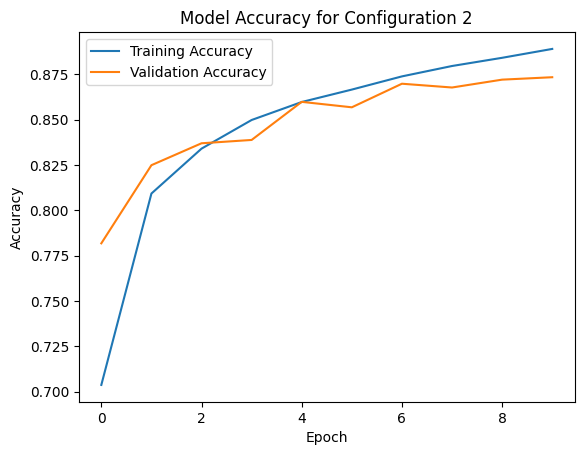

Training model for configuration 3...
Epoch 1/10
375/375 - 19s - loss: 0.6028 - accuracy: 0.7783 - val_loss: 0.4555 - val_accuracy: 0.8322 - 19s/epoch - 51ms/step
Epoch 2/10
375/375 - 17s - loss: 0.3941 - accuracy: 0.8562 - val_loss: 0.3779 - val_accuracy: 0.8596 - 17s/epoch - 46ms/step
Epoch 3/10
375/375 - 19s - loss: 0.3351 - accuracy: 0.8767 - val_loss: 0.3288 - val_accuracy: 0.8803 - 19s/epoch - 52ms/step
Epoch 4/10
375/375 - 17s - loss: 0.2989 - accuracy: 0.8892 - val_loss: 0.3090 - val_accuracy: 0.8865 - 17s/epoch - 45ms/step
Epoch 5/10
375/375 - 17s - loss: 0.2720 - accuracy: 0.8992 - val_loss: 0.2883 - val_accuracy: 0.8952 - 17s/epoch - 46ms/step
Epoch 6/10
375/375 - 18s - loss: 0.2508 - accuracy: 0.9075 - val_loss: 0.2881 - val_accuracy: 0.8957 - 18s/epoch - 48ms/step
Epoch 7/10
375/375 - 17s - loss: 0.2323 - accuracy: 0.9136 - val_loss: 0.2716 - val_accuracy: 0.9039 - 17s/epoch - 45ms/step
Epoch 8/10
375/375 - 19s - loss: 0.2156 - accuracy: 0.9197 - val_loss: 0.2790 - val_acc

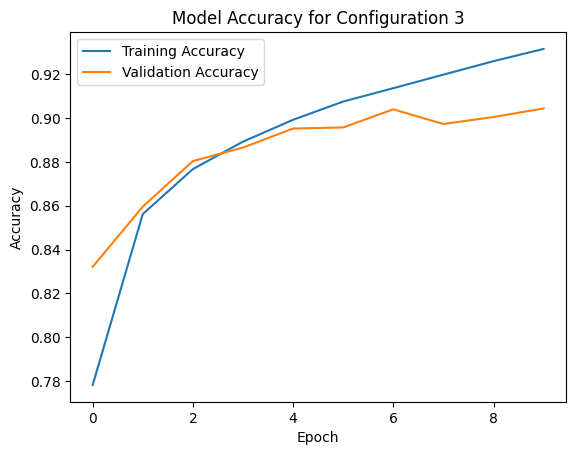

Training model for configuration 4...
Epoch 1/10
750/750 - 37s - loss: 2.2348 - accuracy: 0.2522 - val_loss: 2.1435 - val_accuracy: 0.3873 - 37s/epoch - 49ms/step
Epoch 2/10
750/750 - 33s - loss: 1.9035 - accuracy: 0.5031 - val_loss: 1.5390 - val_accuracy: 0.5838 - 33s/epoch - 44ms/step
Epoch 3/10
750/750 - 34s - loss: 1.2333 - accuracy: 0.6180 - val_loss: 1.0210 - val_accuracy: 0.6518 - 34s/epoch - 46ms/step
Epoch 4/10
750/750 - 34s - loss: 0.9484 - accuracy: 0.6766 - val_loss: 0.8765 - val_accuracy: 0.7010 - 34s/epoch - 45ms/step
Epoch 5/10
750/750 - 33s - loss: 0.8520 - accuracy: 0.6995 - val_loss: 0.8122 - val_accuracy: 0.7070 - 33s/epoch - 45ms/step
Epoch 6/10
750/750 - 35s - loss: 0.7997 - accuracy: 0.7163 - val_loss: 0.7656 - val_accuracy: 0.7295 - 35s/epoch - 46ms/step
Epoch 7/10
750/750 - 35s - loss: 0.7625 - accuracy: 0.7265 - val_loss: 0.7359 - val_accuracy: 0.7349 - 35s/epoch - 46ms/step
Epoch 8/10
750/750 - 34s - loss: 0.7325 - accuracy: 0.7377 - val_loss: 0.7125 - val_acc

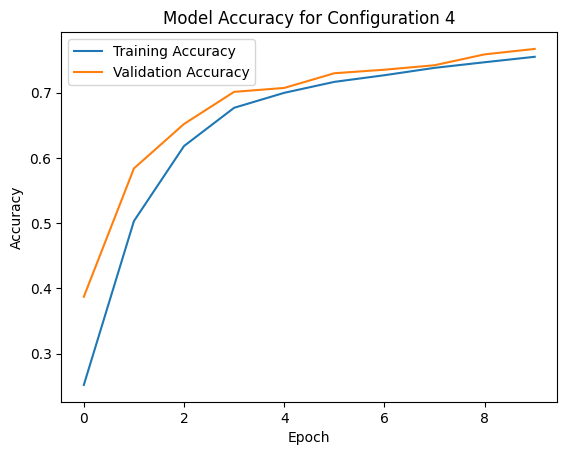

Training model for configuration 5...
Epoch 1/10
375/375 - 19s - loss: 0.7357 - accuracy: 0.7280 - val_loss: 0.5434 - val_accuracy: 0.8049 - 19s/epoch - 52ms/step
Epoch 2/10
375/375 - 20s - loss: 0.4831 - accuracy: 0.8244 - val_loss: 0.4343 - val_accuracy: 0.8425 - 20s/epoch - 54ms/step
Epoch 3/10
375/375 - 18s - loss: 0.4232 - accuracy: 0.8458 - val_loss: 0.4244 - val_accuracy: 0.8468 - 18s/epoch - 49ms/step
Epoch 4/10
375/375 - 20s - loss: 0.3799 - accuracy: 0.8602 - val_loss: 0.3959 - val_accuracy: 0.8534 - 20s/epoch - 54ms/step
Epoch 5/10
375/375 - 18s - loss: 0.3571 - accuracy: 0.8680 - val_loss: 0.3656 - val_accuracy: 0.8666 - 18s/epoch - 49ms/step
Epoch 6/10
375/375 - 19s - loss: 0.3358 - accuracy: 0.8761 - val_loss: 0.3515 - val_accuracy: 0.8760 - 19s/epoch - 52ms/step
Epoch 7/10
375/375 - 18s - loss: 0.3165 - accuracy: 0.8823 - val_loss: 0.3600 - val_accuracy: 0.8664 - 18s/epoch - 48ms/step
Epoch 8/10
375/375 - 20s - loss: 0.2992 - accuracy: 0.8892 - val_loss: 0.3495 - val_acc

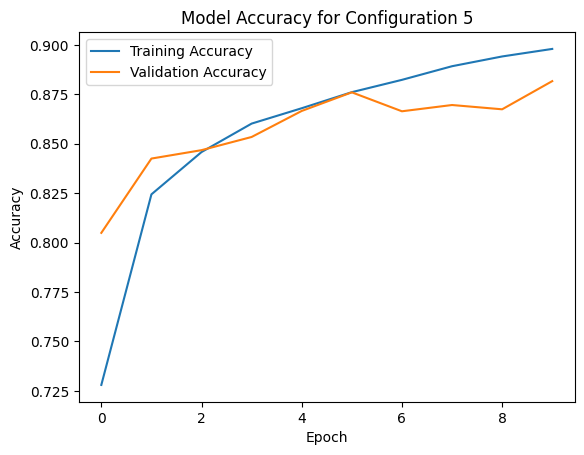

Training model for configuration 6...
Epoch 1/10
375/375 - 18s - loss: 0.6560 - accuracy: 0.7608 - val_loss: 0.5103 - val_accuracy: 0.8092 - 18s/epoch - 49ms/step
Epoch 2/10
375/375 - 19s - loss: 0.4126 - accuracy: 0.8510 - val_loss: 0.3793 - val_accuracy: 0.8638 - 19s/epoch - 50ms/step
Epoch 3/10
375/375 - 18s - loss: 0.3498 - accuracy: 0.8731 - val_loss: 0.3406 - val_accuracy: 0.8770 - 18s/epoch - 47ms/step
Epoch 4/10
375/375 - 20s - loss: 0.3152 - accuracy: 0.8840 - val_loss: 0.3199 - val_accuracy: 0.8840 - 20s/epoch - 53ms/step
Epoch 5/10
375/375 - 17s - loss: 0.2884 - accuracy: 0.8944 - val_loss: 0.2974 - val_accuracy: 0.8925 - 17s/epoch - 47ms/step
Epoch 6/10
375/375 - 19s - loss: 0.2689 - accuracy: 0.9008 - val_loss: 0.2961 - val_accuracy: 0.8934 - 19s/epoch - 49ms/step
Epoch 7/10
375/375 - 18s - loss: 0.2522 - accuracy: 0.9063 - val_loss: 0.2696 - val_accuracy: 0.9023 - 18s/epoch - 47ms/step
Epoch 8/10
375/375 - 17s - loss: 0.2383 - accuracy: 0.9119 - val_loss: 0.2775 - val_acc

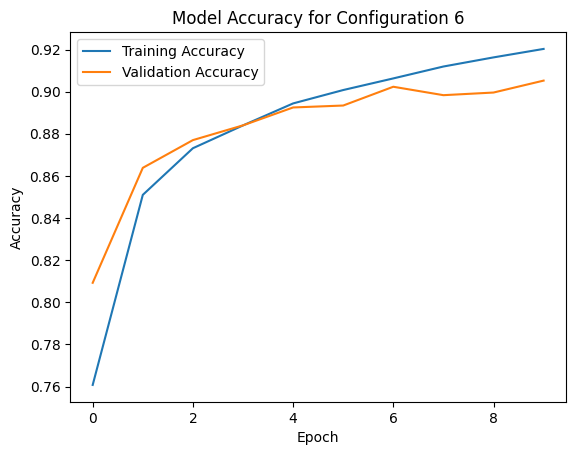

Training model for configuration 7...
Epoch 1/10
750/750 - 35s - loss: 1.8046 - accuracy: 0.4463 - val_loss: 1.0144 - val_accuracy: 0.6634 - 35s/epoch - 47ms/step
Epoch 2/10
750/750 - 35s - loss: 0.8707 - accuracy: 0.6912 - val_loss: 0.7901 - val_accuracy: 0.6938 - 35s/epoch - 46ms/step
Epoch 3/10
750/750 - 37s - loss: 0.7504 - accuracy: 0.7257 - val_loss: 0.6885 - val_accuracy: 0.7538 - 37s/epoch - 49ms/step
Epoch 4/10
750/750 - 37s - loss: 0.6924 - accuracy: 0.7430 - val_loss: 0.6474 - val_accuracy: 0.7667 - 37s/epoch - 49ms/step
Epoch 5/10
750/750 - 37s - loss: 0.6512 - accuracy: 0.7571 - val_loss: 0.6332 - val_accuracy: 0.7671 - 37s/epoch - 49ms/step
Epoch 6/10
750/750 - 34s - loss: 0.6205 - accuracy: 0.7681 - val_loss: 0.5925 - val_accuracy: 0.7861 - 34s/epoch - 46ms/step
Epoch 7/10
750/750 - 35s - loss: 0.5940 - accuracy: 0.7770 - val_loss: 0.5623 - val_accuracy: 0.7942 - 35s/epoch - 47ms/step
Epoch 8/10
750/750 - 35s - loss: 0.5685 - accuracy: 0.7883 - val_loss: 0.6306 - val_acc

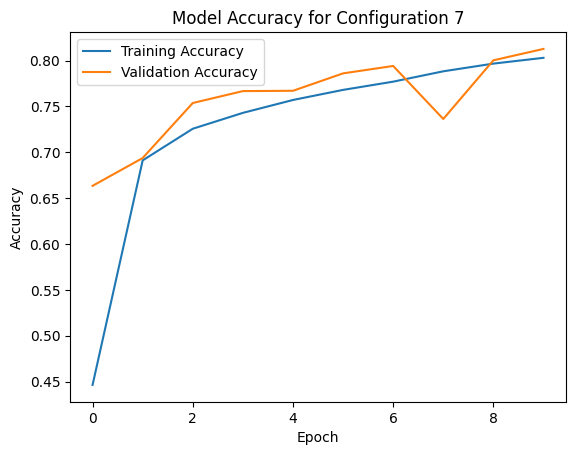

Training model for configuration 8...
Epoch 1/10
375/375 - 20s - loss: 0.7288 - accuracy: 0.7301 - val_loss: 0.5430 - val_accuracy: 0.8048 - 20s/epoch - 53ms/step
Epoch 2/10
375/375 - 19s - loss: 0.4789 - accuracy: 0.8241 - val_loss: 0.4561 - val_accuracy: 0.8357 - 19s/epoch - 51ms/step
Epoch 3/10
375/375 - 18s - loss: 0.4168 - accuracy: 0.8462 - val_loss: 0.4206 - val_accuracy: 0.8471 - 18s/epoch - 48ms/step
Epoch 4/10
375/375 - 20s - loss: 0.3836 - accuracy: 0.8594 - val_loss: 0.4046 - val_accuracy: 0.8554 - 20s/epoch - 52ms/step
Epoch 5/10
375/375 - 18s - loss: 0.3554 - accuracy: 0.8685 - val_loss: 0.3648 - val_accuracy: 0.8684 - 18s/epoch - 48ms/step
Epoch 6/10
375/375 - 19s - loss: 0.3290 - accuracy: 0.8783 - val_loss: 0.3579 - val_accuracy: 0.8704 - 19s/epoch - 50ms/step
Epoch 7/10
375/375 - 18s - loss: 0.3124 - accuracy: 0.8831 - val_loss: 0.3628 - val_accuracy: 0.8698 - 18s/epoch - 48ms/step
Epoch 8/10
375/375 - 20s - loss: 0.2945 - accuracy: 0.8923 - val_loss: 0.3564 - val_acc

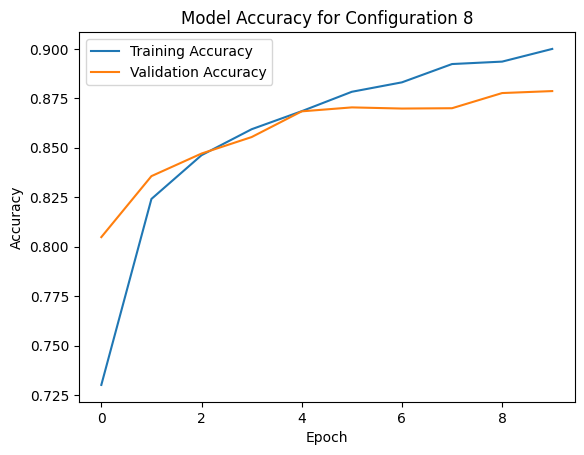

Training model for configuration 9...
Epoch 1/10
375/375 - 20s - loss: 0.5802 - accuracy: 0.7885 - val_loss: 0.4426 - val_accuracy: 0.8363 - 20s/epoch - 52ms/step
Epoch 2/10
375/375 - 18s - loss: 0.3609 - accuracy: 0.8676 - val_loss: 0.3316 - val_accuracy: 0.8796 - 18s/epoch - 48ms/step
Epoch 3/10
375/375 - 18s - loss: 0.3050 - accuracy: 0.8873 - val_loss: 0.3128 - val_accuracy: 0.8856 - 18s/epoch - 47ms/step
Epoch 4/10
375/375 - 19s - loss: 0.2714 - accuracy: 0.8996 - val_loss: 0.2924 - val_accuracy: 0.8903 - 19s/epoch - 50ms/step
Epoch 5/10
375/375 - 18s - loss: 0.2462 - accuracy: 0.9075 - val_loss: 0.2907 - val_accuracy: 0.8932 - 18s/epoch - 47ms/step
Epoch 6/10
375/375 - 18s - loss: 0.2253 - accuracy: 0.9171 - val_loss: 0.2815 - val_accuracy: 0.8983 - 18s/epoch - 49ms/step
Epoch 7/10
375/375 - 17s - loss: 0.2061 - accuracy: 0.9226 - val_loss: 0.2679 - val_accuracy: 0.9007 - 17s/epoch - 47ms/step
Epoch 8/10
375/375 - 19s - loss: 0.1898 - accuracy: 0.9298 - val_loss: 0.2708 - val_acc

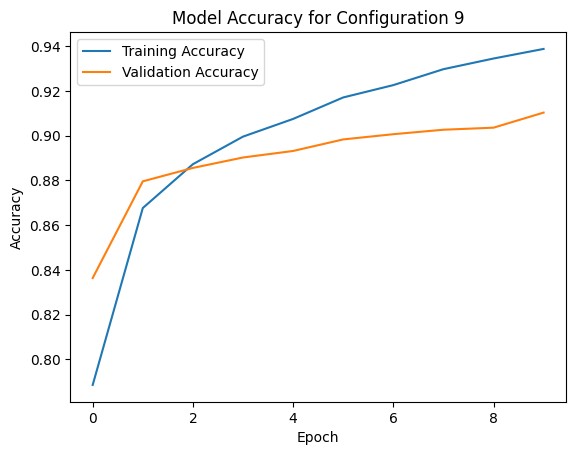

Training model for configuration 10...
Epoch 1/10
750/750 - 34s - loss: 1.6275 - accuracy: 0.5139 - val_loss: 0.9007 - val_accuracy: 0.6673 - 34s/epoch - 46ms/step
Epoch 2/10
750/750 - 34s - loss: 0.7980 - accuracy: 0.7084 - val_loss: 0.7533 - val_accuracy: 0.7157 - 34s/epoch - 46ms/step
Epoch 3/10
750/750 - 34s - loss: 0.6922 - accuracy: 0.7430 - val_loss: 0.6441 - val_accuracy: 0.7655 - 34s/epoch - 45ms/step
Epoch 4/10
750/750 - 34s - loss: 0.6329 - accuracy: 0.7635 - val_loss: 0.6432 - val_accuracy: 0.7513 - 34s/epoch - 45ms/step
Epoch 5/10
750/750 - 35s - loss: 0.5921 - accuracy: 0.7801 - val_loss: 0.6564 - val_accuracy: 0.7139 - 35s/epoch - 46ms/step
Epoch 6/10
750/750 - 34s - loss: 0.5592 - accuracy: 0.7919 - val_loss: 0.5523 - val_accuracy: 0.7931 - 34s/epoch - 46ms/step
Epoch 7/10
750/750 - 33s - loss: 0.5327 - accuracy: 0.8043 - val_loss: 0.5132 - val_accuracy: 0.8152 - 33s/epoch - 44ms/step
Epoch 8/10
750/750 - 35s - loss: 0.5150 - accuracy: 0.8098 - val_loss: 0.5112 - val_ac

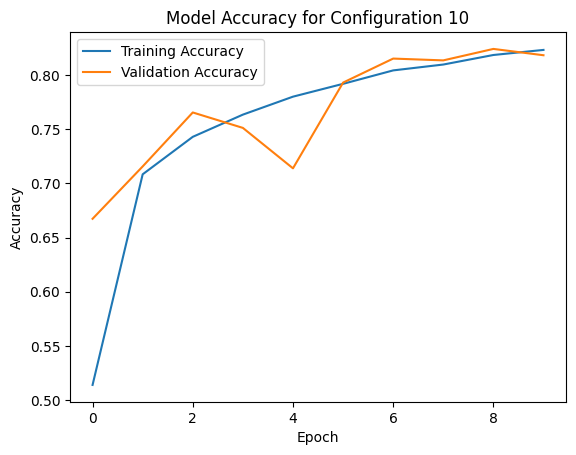

Training model for configuration 11...
Epoch 1/10
375/375 - 20s - loss: 0.5667 - accuracy: 0.7923 - val_loss: 0.4100 - val_accuracy: 0.8511 - 20s/epoch - 53ms/step
Epoch 2/10
375/375 - 17s - loss: 0.3684 - accuracy: 0.8669 - val_loss: 0.3620 - val_accuracy: 0.8645 - 17s/epoch - 47ms/step
Epoch 3/10
375/375 - 19s - loss: 0.3165 - accuracy: 0.8841 - val_loss: 0.3024 - val_accuracy: 0.8900 - 19s/epoch - 50ms/step
Epoch 4/10
375/375 - 18s - loss: 0.2853 - accuracy: 0.8947 - val_loss: 0.3005 - val_accuracy: 0.8878 - 18s/epoch - 47ms/step
Epoch 5/10
375/375 - 18s - loss: 0.2594 - accuracy: 0.9047 - val_loss: 0.2882 - val_accuracy: 0.8950 - 18s/epoch - 47ms/step
Epoch 6/10
375/375 - 19s - loss: 0.2410 - accuracy: 0.9120 - val_loss: 0.2725 - val_accuracy: 0.9036 - 19s/epoch - 49ms/step
Epoch 7/10
375/375 - 17s - loss: 0.2214 - accuracy: 0.9171 - val_loss: 0.2618 - val_accuracy: 0.9048 - 17s/epoch - 46ms/step
Epoch 8/10
375/375 - 20s - loss: 0.2071 - accuracy: 0.9235 - val_loss: 0.2657 - val_ac

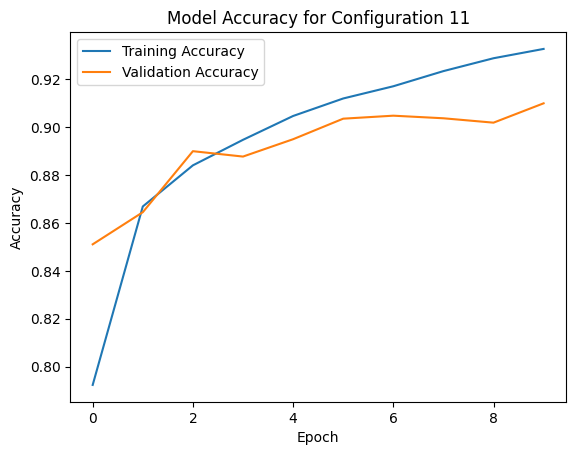

Training model for configuration 12...
Epoch 1/10
750/750 - 27s - loss: 2.2914 - accuracy: 0.1590 - val_loss: 2.2797 - val_accuracy: 0.1650 - 27s/epoch - 36ms/step
Epoch 2/10
750/750 - 21s - loss: 2.2690 - accuracy: 0.1907 - val_loss: 2.2543 - val_accuracy: 0.2201 - 21s/epoch - 28ms/step
Epoch 3/10
750/750 - 22s - loss: 2.2319 - accuracy: 0.2408 - val_loss: 2.1994 - val_accuracy: 0.2777 - 22s/epoch - 29ms/step
Epoch 4/10
750/750 - 21s - loss: 2.1380 - accuracy: 0.3173 - val_loss: 2.0474 - val_accuracy: 0.3433 - 21s/epoch - 27ms/step
Epoch 5/10
750/750 - 21s - loss: 1.8790 - accuracy: 0.3895 - val_loss: 1.6730 - val_accuracy: 0.4930 - 21s/epoch - 28ms/step
Epoch 6/10
750/750 - 21s - loss: 1.4679 - accuracy: 0.5528 - val_loss: 1.2822 - val_accuracy: 0.6082 - 21s/epoch - 28ms/step
Epoch 7/10
750/750 - 20s - loss: 1.1833 - accuracy: 0.6104 - val_loss: 1.0917 - val_accuracy: 0.6455 - 20s/epoch - 27ms/step
Epoch 8/10
750/750 - 20s - loss: 1.0517 - accuracy: 0.6368 - val_loss: 0.9950 - val_ac

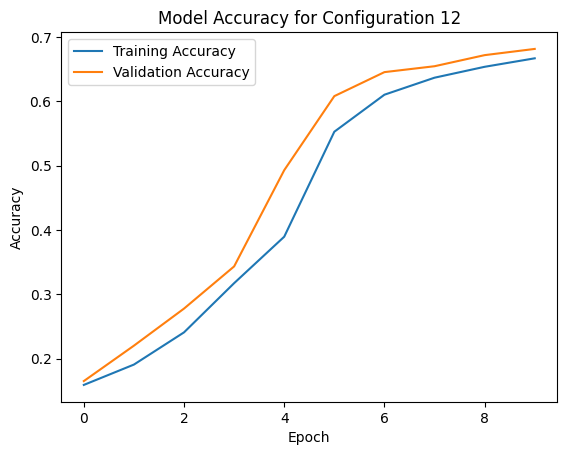

Training model for configuration 13...
Epoch 1/10
375/375 - 18s - loss: 0.5603 - accuracy: 0.7953 - val_loss: 0.3655 - val_accuracy: 0.8677 - 18s/epoch - 48ms/step
Epoch 2/10
375/375 - 18s - loss: 0.3363 - accuracy: 0.8747 - val_loss: 0.3163 - val_accuracy: 0.8834 - 18s/epoch - 49ms/step
Epoch 3/10
375/375 - 17s - loss: 0.2848 - accuracy: 0.8931 - val_loss: 0.2815 - val_accuracy: 0.8988 - 17s/epoch - 45ms/step
Epoch 4/10
375/375 - 18s - loss: 0.2514 - accuracy: 0.9072 - val_loss: 0.2681 - val_accuracy: 0.9017 - 18s/epoch - 49ms/step
Epoch 5/10
375/375 - 17s - loss: 0.2266 - accuracy: 0.9137 - val_loss: 0.2711 - val_accuracy: 0.9040 - 17s/epoch - 45ms/step
Epoch 6/10
375/375 - 17s - loss: 0.2065 - accuracy: 0.9229 - val_loss: 0.3049 - val_accuracy: 0.8910 - 17s/epoch - 46ms/step
Epoch 7/10
375/375 - 18s - loss: 0.1891 - accuracy: 0.9281 - val_loss: 0.2847 - val_accuracy: 0.9037 - 18s/epoch - 48ms/step
313/313 - 2s - loss: 0.2831 - accuracy: 0.8944 - 2s/epoch - 5ms/step
Test accuracy for

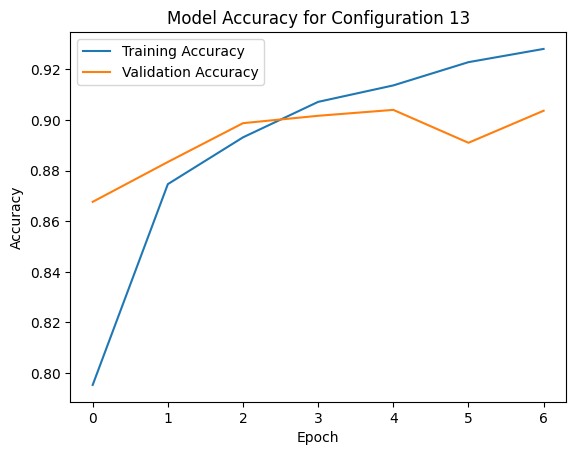

Training model for configuration 14...
Epoch 1/10
750/750 - 36s - loss: 0.4570 - accuracy: 0.8332 - val_loss: 0.3362 - val_accuracy: 0.8790 - 36s/epoch - 48ms/step
Epoch 2/10
750/750 - 34s - loss: 0.3002 - accuracy: 0.8883 - val_loss: 0.3015 - val_accuracy: 0.8902 - 34s/epoch - 45ms/step
Epoch 3/10
750/750 - 34s - loss: 0.2560 - accuracy: 0.9055 - val_loss: 0.2688 - val_accuracy: 0.9000 - 34s/epoch - 46ms/step
Epoch 4/10
750/750 - 35s - loss: 0.2255 - accuracy: 0.9161 - val_loss: 0.2787 - val_accuracy: 0.8998 - 35s/epoch - 46ms/step
Epoch 5/10
750/750 - 34s - loss: 0.2014 - accuracy: 0.9240 - val_loss: 0.3079 - val_accuracy: 0.8949 - 34s/epoch - 45ms/step
Epoch 6/10
750/750 - 33s - loss: 0.1791 - accuracy: 0.9322 - val_loss: 0.2634 - val_accuracy: 0.9023 - 33s/epoch - 45ms/step
Epoch 7/10
750/750 - 34s - loss: 0.1573 - accuracy: 0.9400 - val_loss: 0.2637 - val_accuracy: 0.9071 - 34s/epoch - 46ms/step
Epoch 8/10
750/750 - 34s - loss: 0.1408 - accuracy: 0.9485 - val_loss: 0.2903 - val_ac

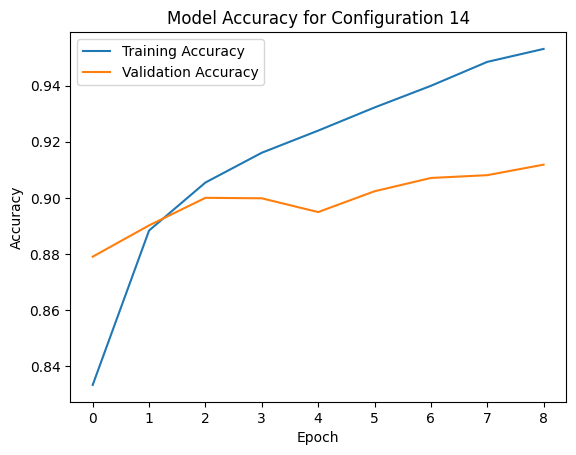

Training model for configuration 15...
Epoch 1/10
375/375 - 19s - loss: 2.2996 - accuracy: 0.1584 - val_loss: 2.2932 - val_accuracy: 0.1898 - 19s/epoch - 50ms/step
Epoch 2/10
375/375 - 19s - loss: 2.2879 - accuracy: 0.2297 - val_loss: 2.2817 - val_accuracy: 0.2805 - 19s/epoch - 50ms/step
Epoch 3/10
375/375 - 18s - loss: 2.2753 - accuracy: 0.3137 - val_loss: 2.2677 - val_accuracy: 0.3329 - 18s/epoch - 47ms/step
Epoch 4/10
375/375 - 20s - loss: 2.2587 - accuracy: 0.3451 - val_loss: 2.2478 - val_accuracy: 0.3513 - 20s/epoch - 52ms/step
Epoch 5/10
375/375 - 18s - loss: 2.2337 - accuracy: 0.3555 - val_loss: 2.2156 - val_accuracy: 0.3627 - 18s/epoch - 48ms/step
Epoch 6/10
375/375 - 19s - loss: 2.1898 - accuracy: 0.3729 - val_loss: 2.1551 - val_accuracy: 0.3708 - 19s/epoch - 50ms/step
Epoch 7/10
375/375 - 18s - loss: 2.1013 - accuracy: 0.3761 - val_loss: 2.0281 - val_accuracy: 0.3978 - 18s/epoch - 47ms/step
Epoch 8/10
375/375 - 18s - loss: 1.9129 - accuracy: 0.4102 - val_loss: 1.7649 - val_ac

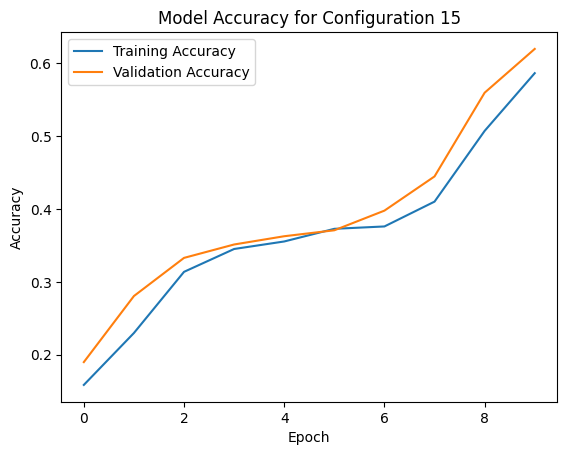

The best accuracy achieved among all configurations is: 0.90420001745224 for Configuration 9


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define a function to create and compile the CNN model
def create_cnn_model(num_conv_layers, num_filters, kernel_sizes, pool_sizes, num_dense_units, learning_rate, optimizer_name, batch_size, epochs):
    model = models.Sequential()

    # Add convolutional layers
    for i in range(num_conv_layers):
        model.add(layers.Conv2D(num_filters[i], kernel_sizes[i], activation='relu', input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D(pool_size=pool_sizes[i]))

    model.add(layers.Flatten())

    # Add dense layers
    for units in num_dense_units:
        model.add(layers.Dense(units, activation='relu'))

    model.add(layers.Dense(10))  # Output layer

    # Compile the model
    if optimizer_name == 'SGD':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_name == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unknown optimizer: {optimizer_name}")

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

# Configurations for achieving around 90% accuracy
configurations = [
    # Configuration 1
    {
        'num_conv_layers': 2,
        'num_filters': [32, 64],
        'kernel_sizes': [(3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.01,
        'optimizer_name': 'SGD',
        'batch_size': 64,
        'epochs': 10
    },
    # Configuration 2
    {
        'num_conv_layers': 3,
        'num_filters': [16, 32, 64],
        'kernel_sizes': [(3, 3), (3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.001,
        'optimizer_name': 'Adam',
        'batch_size': 128,
        'epochs': 10
    },
    # Configuration 3
    {
        'num_conv_layers': 2,
        'num_filters': [16, 32],
        'kernel_sizes': [(3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.0015,
        'optimizer_name': 'RMSprop',
        'batch_size': 128,
        'epochs': 10
    },
    # Configuration 4
    {
        'num_conv_layers': 2,
        'num_filters': [32, 64],
        'kernel_sizes': [(3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.001,
        'optimizer_name': 'SGD',
        'batch_size': 64,
        'epochs': 10
    },
    # Configuration 5
    {
        'num_conv_layers': 3,
        'num_filters': [16, 32, 64],
        'kernel_sizes': [(3, 3), (3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.002,
        'optimizer_name': 'Adam',
        'batch_size': 128,
        'epochs': 10
    },
    # Configuration 6
    {
        'num_conv_layers': 2,
        'num_filters': [16, 32],
        'kernel_sizes': [(3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.001,
        'optimizer_name': 'RMSprop',
        'batch_size': 128,
        'epochs': 10
    },
    # Configuration 7
    {
        'num_conv_layers': 2,
        'num_filters': [32, 64],
        'kernel_sizes': [(3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.003,
        'optimizer_name': 'SGD',
        'batch_size': 64,
        'epochs': 10
    },
    # Configuration 8
    {
        'num_conv_layers': 3,
        'num_filters': [16, 32, 64],
        'kernel_sizes': [(3, 3), (3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.0025,
        'optimizer_name': 'Adam',
        'batch_size': 128,
        'epochs': 10
    },
    # Configuration 9
    {
        'num_conv_layers': 2,
        'num_filters': [16, 32],
        'kernel_sizes': [(3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.002,
        'optimizer_name': 'RMSprop',
        'batch_size': 128,
        'epochs': 10
    },
    # Configuration 10
    {
        'num_conv_layers': 2,
        'num_filters': [32, 64],
        'kernel_sizes': [(3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.004,
        'optimizer_name': 'SGD',
        'batch_size': 64,
        'epochs': 10
    },
    # Configuration 11
    {
        'num_conv_layers': 2,
        'num_filters': [16, 32],
        'kernel_sizes': [(3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.002,
        'optimizer_name': 'Adam',
        'batch_size': 128,
        'epochs': 10
    },
    # Configuration 12
    {
        'num_conv_layers': 3,
        'num_filters': [16, 32, 64],
        'kernel_sizes': [(3, 3), (3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.001,
        'optimizer_name': 'SGD',
        'batch_size': 64,
        'epochs': 10
    },
    # Configuration 13
    {
        'num_conv_layers': 2,
        'num_filters': [16, 32],
        'kernel_sizes': [(3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.003,
        'optimizer_name': 'RMSprop',
        'batch_size': 128,
        'epochs': 10
    },
    # Configuration 14
    {
        'num_conv_layers': 2,
        'num_filters': [32, 64],
        'kernel_sizes': [(3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.0025,
        'optimizer_name': 'Adam',
        'batch_size': 64,
        'epochs': 10
    },
    # Configuration 15
    {
        'num_conv_layers': 3,
        'num_filters': [16, 32, 64],
        'kernel_sizes': [(3, 3), (3, 3), (3, 3)],
        'pool_sizes': [(2, 2), (2, 2), (2, 2)],
        'num_dense_units': [128],
        'learning_rate': 0.0015,
        'optimizer_name': 'SGD',
        'batch_size': 128,
        'epochs': 10
    },
]

best_accuracy = 0
best_config = None

# Train and evaluate models for each configuration
for i, config in enumerate(configurations):
    print(f"Training model for configuration {i+1}...")

    # Extract parameters not used in create_cnn_model function
    batch_size = config.pop('batch_size')
    epochs = config.pop('epochs')

    # Create and compile the model
    model = create_cnn_model(**config, batch_size=batch_size, epochs=epochs)

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=epochs,
                        batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping], verbose=2)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels, verbose=2)
    print(f"Test accuracy for configuration {i+1}: {test_acc}")

    # Update best accuracy and configuration
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_config = i + 1

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy for Configuration {i+1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

print(f"The best accuracy achieved among all configurations is: {best_accuracy} for Configuration {best_config}")
